# UMAP plots reproduction

Prior to running this notebook, one has to run the script

`generate_patient_embeddings.py`

## Figure 3

In [1]:
#Load pkl from /braid/

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from scimilarity.utils import clean_tissues

last_layer = True

with open(f"/braid/cellm/interpretation/UMAP/patient_embeddings_last_layer_{last_layer}.pkl", "rb") as f:
    h_tensor = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/disease_labels_last_layer_{last_layer}.pkl", "rb") as f:
    disease_list = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/tissue_labels_last_layer_{last_layer}.pkl", "rb") as f:
    tissue_list = pickle.load(f)

In [2]:
map_disease = {"Alzheimer's disease": "Alzheimer's disease",
'B-cell acute lymphoblastic leukemia': "B-cell acute lymphoblastic leukemia",
'COVID-19': "COVID-19",
"Crohn's disease": "Crohn's disease",
'healthy': "Healthy",
'lung adenocarcinoma': "Lung adenocarcinoma",
'melanoma': "Melanoma",
'multiple myeloma': "Multiple myeloma",
'multiple sclerosis': "Multiple sclerosis"}

color_map = {
    'Healthy': '#d5deb8',#'#ccd6ab',
    'COVID-19 (lung)': '#e86b4a',
    'COVID-19 (blood)': '#e88e4a',
    'COVID-19 (other)': '#e84a4a',
    'Multiple sclerosis': '#45accb',
    "Crohn's disease": '#6e40e6',
    'Melanoma': '#9b3875',
    "Alzheimer's disease": '#64cf20',
    'Lung adenocarcinoma': '#7085de',
    'B-cell acute lymphoblastic leukemia':"#e0c21c",
    'Multiple myeloma':"#2e881d"
}

Tissues = ['Gut', 'Brain', 'Other', 'Female Reproduction', 'Blood', 'Lymph node', 'Male reproduction', 'Heart', 'Lung', 'Kidney', 'Liver', 'Airway', 'Eye', 'Adrenal gland', 'Breast', 'Skin', 'Bone marrow', 'Spleen', 'Bladder', 'Stomach', 'Thymus', 'Pancreas', 'Vasculature', 'Esophagus']

color_tissue_map = {
    'Gut': '#86a652',
    'Brain': '#e35d69',
    'Other': '#e2e3e4',
    'Female Reproduction': '#23347c',
    'Blood': '#8e6c2f',
    'Lymph node': '#fdac6a',
    'Male reproduction': '#3950a9',
    'Heart': '#c29e3b',
    'Lung': '#883836',
    'Kidney': '#703c76',
    'Liver': '#5d7b36',
    'Airway': '#b74546',
    'Eye': '#f297a1',
    'Adrenal gland': '#fda12b',
    'Breast': '#576cb9',
    'Skin': '#c86fb6',
    'Bone marrow': '#fa531d',
    'Spleen': '#fc8940',
    'Bladder': '#a14e9c',
    'Stomach': '#b2d26f',
    'Thymus': '#fed1a5',
    'Pancreas': '#cddea0',
    'Vasculature': '#f0b956',
    'Esophagus': '#6fc878'
}

map_tissue = {'adipose': 'Adipose',
            'adrenal gland': "Adrenal gland",
              'airway': "Airway",
                'bladder': "Bladder",
                  'blood': "Blood",
                    'bone': "Bone",
       'bone marrow': "Bone marrow",
         'brain': "Brain",
           'breast': "Breast",
             'esophagus': "Esophagus",
               'eye': "Eye",
       'female reproduction': 'Female Reproduction',
         'gut': "Gut",
           'heart': "Heart",
             'kidney': "Kidney",
               'liver': "Liver",
                 'lung': "Lung",
       'lymph node':   "Lymph node",
         'male reproduction': "Male reproduction",
           'others': "Other",
             'pancreas': "Pancreas",
               'skin': "Skin",
       'spleen': "Spleen",
         'stomach': "Stomach",
           'thymus': "Thymus",
             'vasculature': "Vasculature"}

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
h_scaled = scaler.fit_transform(h_tensor)
pca = PCA(n_components=50) # Retain 2 principal components
h_pca = pca.fit_transform(h_scaled)

df = pd.DataFrame({"disease": disease_list, "og_tissue": tissue_list})
df["disease"] = df["disease"].map(map_disease)
df["tissue"] = clean_tissues(df["og_tissue"])
df["tissue"] = df["tissue"].map(map_tissue)
df["tissue"] = df["tissue"].fillna("Other")

df.loc[(df["disease"] == "COVID-19") & (df["tissue"]=="Lung"),"disease"] = "COVID-19 (lung)"
df.loc[(df["disease"] == "COVID-19") & (df["tissue"]=="Blood"),"disease"] = "COVID-19 (blood)"
df.loc[(df["disease"] == "COVID-19"),"disease"] = "COVID-19 (other)"

df["disease"] = df["disease"].astype("category")
df["tissue"] = df["tissue"].astype("category")

adata = anndata.AnnData(X=h_scaled, obs=df)

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


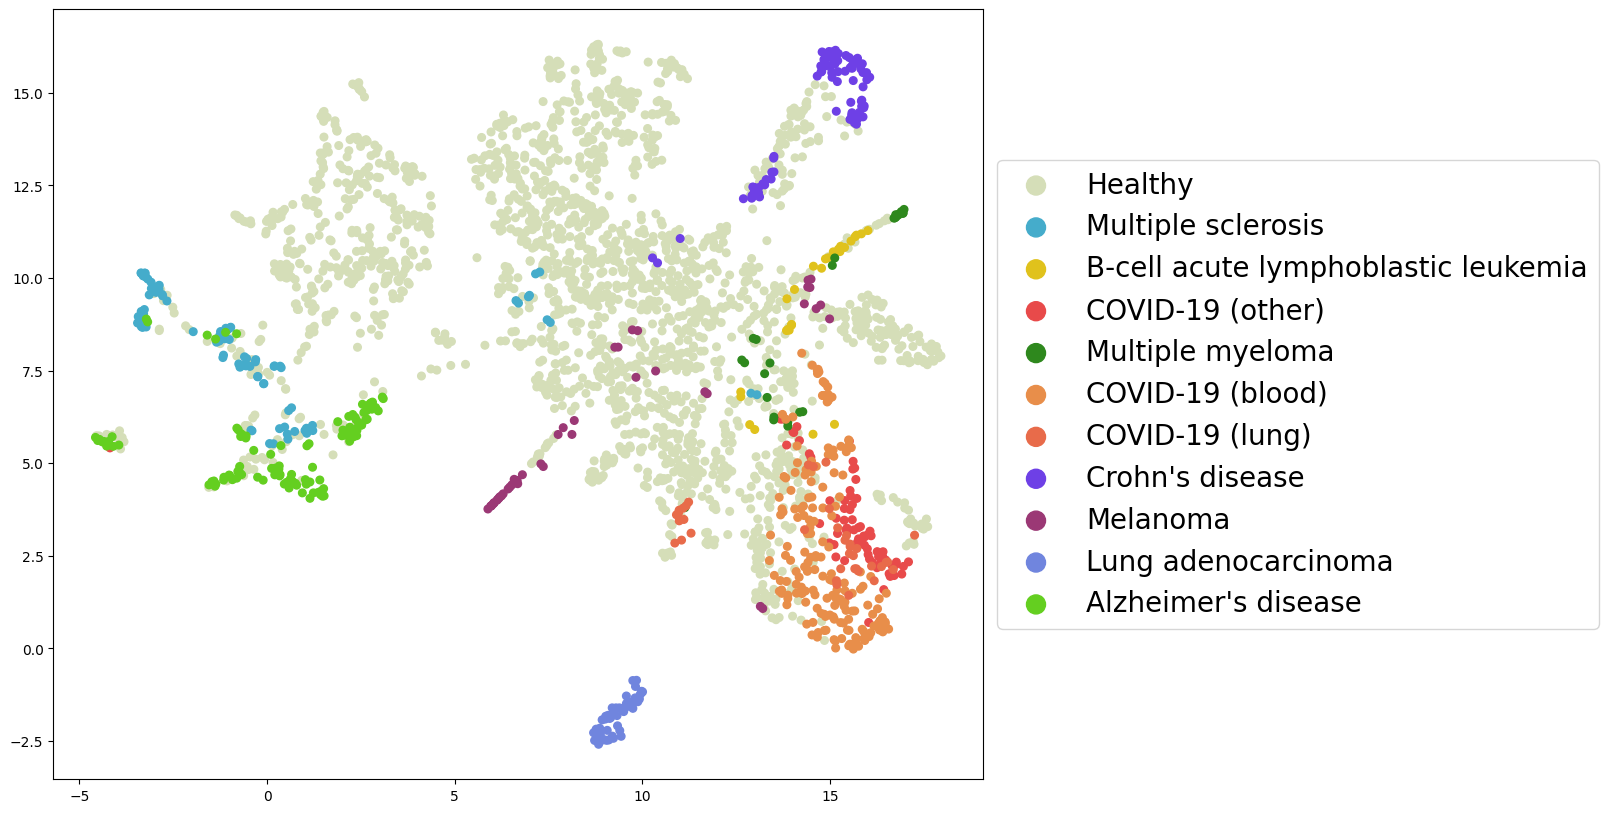

In [4]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata, random_state=0)

import matplotlib.pyplot as plt
import scanpy as sc

# Define the color map for your labels

color_map = {
    'Healthy': '#d5deb8',#'#ccd6ab',
    'COVID-19 (lung)': '#e86b4a',
    'COVID-19 (blood)': '#e88e4a',
    'COVID-19 (other)': '#e84a4a',
    'Multiple sclerosis': '#45accb',
    "Crohn's disease": '#6e40e6',
    'Melanoma': '#9b3875',
    "Alzheimer's disease": '#64cf20',
    'Lung adenocarcinoma': '#7085de',
    'B-cell acute lymphoblastic leukemia':"#e0c21c",
    'Multiple myeloma':"#2e881d"
}

plt.figure(figsize=(12, 10))
for disease_state in adata.obs["disease"].unique():
    adata_sub = adata[adata.obs["disease"]==disease_state]
    plt.scatter(adata_sub.obsm["X_umap"][:, 0], adata_sub.obsm["X_umap"][:, 1], c = [color_map[disease_state]]*adata_sub.shape[0], s = 30, label = disease_state)
    #plt.legend(adata.obs["disease"].unique(),fontsize = 20, loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.legend(
    fontsize=20,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    scatterpoints=1,
    markerscale=2.5   # increase this value to make legend markers bigger
)
plt.savefig(f"./figures/umap_disease_last_layer_{last_layer}.pdf", bbox_inches='tight', pad_inches=0.1)


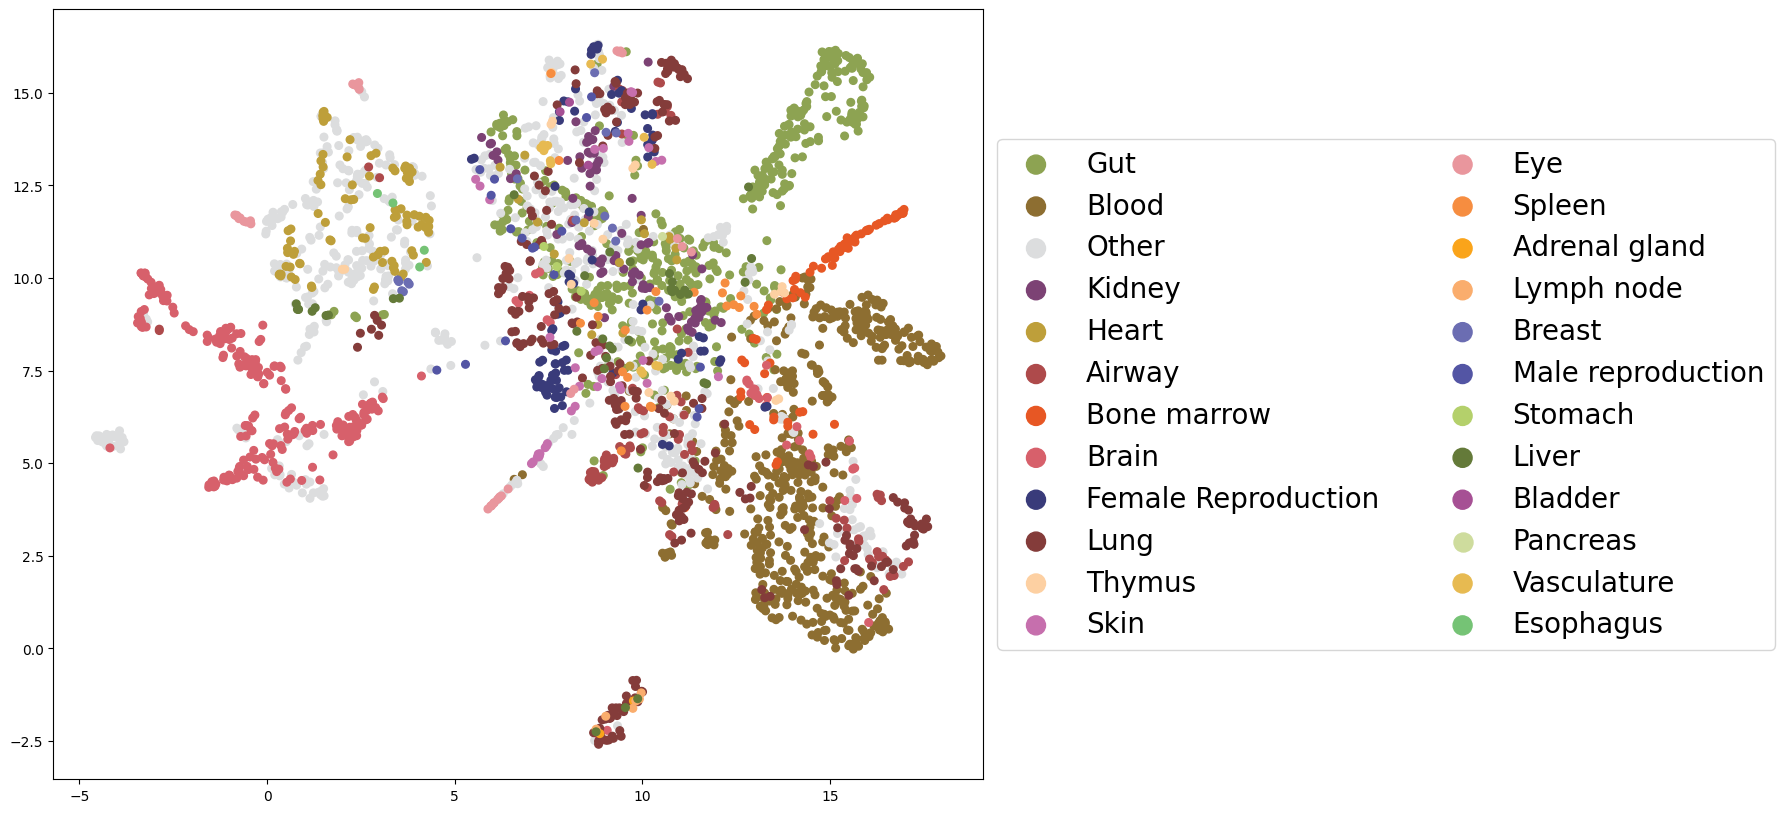

In [5]:
color_map_tissue = {
    'Gut': '#8da352',
    'Blood': '#8d6e31',
    'Other': '#dcddde',
    'Kidney': '#7c4274',
    'Heart': '#be9f3a',
    'Airway': '#ae4a4b',
    'Bone marrow': '#e75724',
    'Brain': '#d7606b',
    'Female Reproduction': '#393b7a',
    'Lung': '#843c3a',
    'Thymus': '#fdd0a2',
    'Skin': '#c66fad',
    'Eye': '#e9969d',
    'Spleen': '#f68d40',
    'Adrenal gland': '#faa41a',
    'Lymph node': '#faad6d',
    'Breast': '#6b6db2',
    'Male reproduction': '#5355a4',
    'Stomach': '#b4d06b',
    'Liver': '#647a39',
    'Bladder': '#a65094',
    'Pancreas': '#cedc9d',
    'Vasculature': '#e7ba51',
    'Esophagus': '#75c375'}


plt.figure(figsize=(12, 10))
for tissue in adata.obs["tissue"].unique():
    adata_sub = adata[adata.obs["tissue"]==tissue]
    plt.scatter(adata_sub.obsm["X_umap"][:, 0], adata_sub.obsm["X_umap"][:, 1], c = [color_map_tissue[tissue]]*adata_sub.shape[0], s = 30, label = tissue)
    #plt.legend(adata.obs["tissue"].unique(),fontsize = 20, loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.legend(
    fontsize=20,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    scatterpoints=1,
    markerscale=2.5,   # increase this value to make legend markers bigger
    ncol = 2
)
plt.savefig(f"./figures/umap_tissue_last_layer_{last_layer}.pdf", bbox_inches='tight', pad_inches=0.1)


## Brain white matter in MS

In [6]:
import numpy as np

ms_white_matter = [str(i) for i in range(len(tissue_list)) if (tissue_list[i] == "brain white matter") and (disease_list[i] == "multiple sclerosis")]

adata.obs["ms_white_matter"] = "Other"
adata.obs.loc[adata.obs["disease"]=="Multiple sclerosis","ms_white_matter"] = "Multiple Sclerosis"
adata.obs.loc[ms_white_matter,"ms_white_matter"] = "Multiple Sclerosis White Matter"

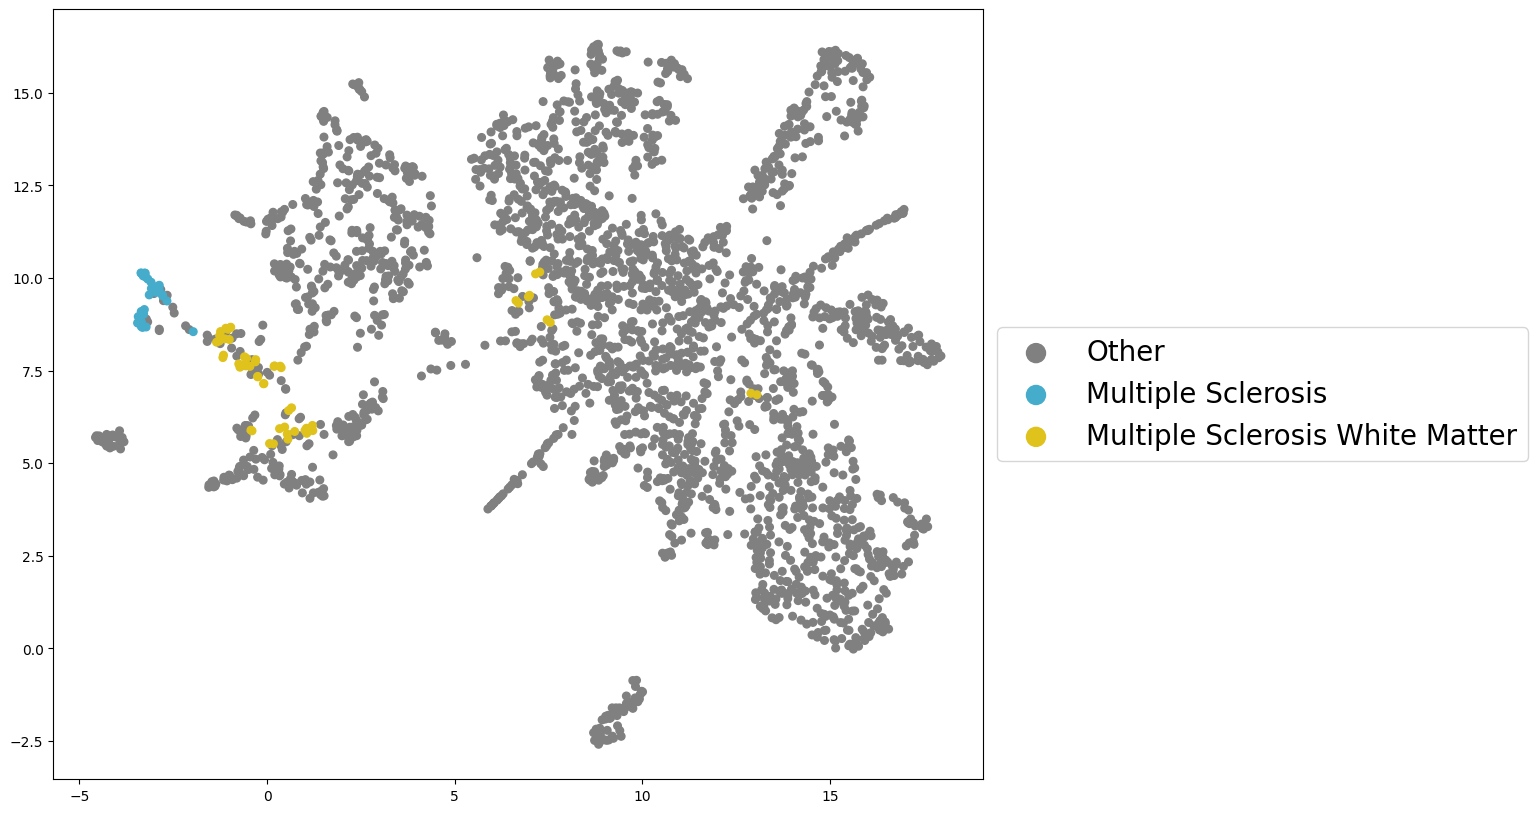

In [7]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define the color map for your labels

color_map = {
    "Other": 'grey',#'#ccd6ab',
    "Multiple Sclerosis": '#45accb',
    "Multiple Sclerosis White Matter":"#e0c21c",
}

plt.figure(figsize=(12, 10))
for disease_state in adata.obs["ms_white_matter"].unique():
    adata_sub = adata[adata.obs["ms_white_matter"]==disease_state]
    plt.scatter(adata_sub.obsm["X_umap"][:, 0], adata_sub.obsm["X_umap"][:, 1], c = [color_map[disease_state]]*adata_sub.shape[0], s = 30, label = disease_state)
    #plt.legend(adata.obs["disease"].unique(),fontsize = 20, loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.legend(
    fontsize=20,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    scatterpoints=1,
    markerscale=2.5   # increase this value to make legend markers bigger
)
plt.savefig(f"./figures/umap_white_matter_ms_last_layer_{last_layer}.pdf", bbox_inches='tight', pad_inches=0.1)


## Cell-level embeddings

In [13]:
import numpy as np
from cellm.data.data_scimilarity import import_cell_ontology, get_id_mapper

#Load pkl from /braid/

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from scimilarity.utils import clean_tissues

last_layer = True

with open(f"/braid/cellm/interpretation/UMAP/full_cell_embeddings_last_layer_{last_layer}.pkl", "rb") as f:
    cell_embeddings = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/full_celltype_labels_last_layer_{last_layer}.pkl", "rb") as f:
    celltype_labels = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/full_fold_list_last_layer_{last_layer}.pkl", "rb") as f:
    fold_list = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/full_sample_labels_last_layer_{last_layer}.pkl", "rb") as f:
    sample_labels = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/full_patient_embeddings_last_layer_{last_layer}.pkl", "rb") as f:
    patient_embeddings = pickle.load(f)

In [14]:
with open(f"/braid/cellm/interpretation/UMAP/full_disease_labels_last_layer_{last_layer}.pkl", "rb") as f:
    disease_list = pickle.load(f)

with open(f"/braid/cellm/interpretation/UMAP/full_tissue_labels_last_layer_{last_layer}.pkl", "rb") as f:
    tissue_list = pickle.load(f)

In [11]:
from cellm.utils.reprod import load_model, load_binary_model
run_name = "2025-02-09_22-25-15"
model_name = "epoch_002" 
config_path = f"/homefs/home/debroue1/projects/cellm/logs/train/runs/{run_name}/.hydra/"
checkpoint_path = f"/homefs/home/debroue1/projects/cellm/logs/train/runs/{run_name}/checkpoints/{model_name}.ckpt"
model, dl = load_model(config_path, checkpoint_path)

hydra:
  run:
    dir: outputs/${now:%Y-%m-%d}/${now:%H-%M-%S}
  sweep:
    dir: multirun/${now:%Y-%m-%d}/${now:%H-%M-%S}
    subdir: ${hydra.job.num}
  launcher:
    _target_: hydra._internal.core_plugins.basic_launcher.BasicLauncher
  sweeper:
    _target_: hydra._internal.core_plugins.basic_sweeper.BasicSweeper
    max_batch_size: null
    params: null
  help:
    app_name: ${hydra.job.name}
    header: '${hydra.help.app_name} is powered by Hydra.

      '
    footer: 'Powered by Hydra (https://hydra.cc)

      Use --hydra-help to view Hydra specific help

      '
    template: '${hydra.help.header}

      == Configuration groups ==

      Compose your configuration from those groups (group=option)


      $APP_CONFIG_GROUPS


      == Config ==

      Override anything in the config (foo.bar=value)


      $CONFIG


      ${hydra.help.footer}

      '
  hydra_help:
    template: 'Hydra (${hydra.runtime.version})

      See https://hydra.cc for more info.


      == Flags ==

      

/homefs/home/debroue1/projects/cellm/cellm/utils/reprod.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)
/homefs/home/debroue1/m

In [15]:
cell_embs = np.concatenate([cell_emb for i, cell_emb in enumerate(cell_embeddings) if fold_list[i]=="val"])
celltypes = np.concatenate([celltype_label for i, celltype_label in enumerate(celltype_labels) if fold_list[i]=="val"])
sample_labels = np.concatenate([sample_label for i, sample_label in enumerate(sample_labels) if fold_list[i]=="val"])

cell_type_dict = {v:k for k,v in dl.output_map.labels2int['celltype_id'].items()}
onto = import_cell_ontology()
id2name = get_id_mapper(onto)
cell_type_dict = {k:id2name[v] for k,v in cell_type_dict.items() if v in id2name}

study_sample_dict = {v:k for k,v in dl.output_map.labels2int['study::::sample'].items()}
sample_labs = np.tile(sample_labels[:,None], reps = (1,1500))

fold_list = [[x]* len(cell_embeddings[i]) for i, x in enumerate(fold_list)]
fold_list = [item for sublist in fold_list for item in sublist]
tissue_val = np.array([tissue_list[i] for i, x in enumerate(fold_list) if x == "val"])

tissue_val = np.tile(tissue_val[:,None], reps = (1,1500))

In [16]:
cell_embs = cell_embs.reshape(-1, 1024)
celltypes = celltypes.reshape(-1)
sample_labs = sample_labs.reshape(-1)
tissue_val = tissue_val.reshape(-1)
df = pd.DataFrame({"celltype": celltypes, "study::::sample": sample_labs, "tissue": tissue_val})
df["celltype_name"] = df["celltype"].map(cell_type_dict)
df["study::::sample"] = df["study::::sample"].map(study_sample_dict)
df["study"] = df["study::::sample"].apply(lambda x: x.split("::::")[0])


print(df["celltype_name"].nunique())
print(list(df["celltype_name"].unique()))

cell_type_hierarchy = {
    'stromal cell of ovary': 'Stromal Cell',
    'endothelial cell': 'Endothelial Cell',
    'natural killer cell': 'Lymphocyte',
    'smooth muscle cell': 'Muscle Cell',
    'innate lymphoid cell': 'Lymphocyte',
    'T cell': 'Lymphocyte',
    'myeloid cell': 'Myeloid Cell',
    'B cell': 'Lymphocyte',
    'alpha-beta T cell': 'Lymphocyte',
    'progenitor cell': 'Stem/Progenitor Cell',
    'plasma cell': 'Lymphocyte',
    'transit amplifying cell of small intestine': 'Stem/Progenitor Cell',
    'fibroblast': 'Stromal Cell',
    'glial cell': 'Glial Cell',
    'mast cell': 'Myeloid Cell',
    'endothelial cell of lymphatic vessel': 'Endothelial Cell',
    'Kupffer cell': 'Macrophage',
    'periportal region hepatocyte': 'Hepatocyte',
    'hepatic stellate cell': 'Stromal Cell',
    'blood vessel endothelial cell': 'Endothelial Cell',
    'inflammatory macrophage': 'Macrophage',
    'cholangiocyte': 'Epithelial Cell',
    'erythroid lineage cell': 'Erythroid Cell',
    'CD8-positive, alpha-beta cytotoxic T cell': 'Lymphocyte',
    'monocyte': 'Myeloid Cell',
    'neuron': 'Neural Cell',
    'oligodendrocyte': 'Glial Cell',
    'astrocyte': 'Glial Cell',
    'oligodendrocyte precursor cell': 'Glial Cell',
    'vascular associated smooth muscle cell': 'Muscle Cell',
    'macrophage': 'Myeloid Cell',
    'lymphocyte': 'Lymphocyte',
    'alveolar macrophage': 'Macrophage',
    'cytotoxic T cell': 'Lymphocyte',
    'classical monocyte': 'Myeloid Cell',
    'pulmonary alveolar type 1 cell': 'Epithelial Cell',
    'pulmonary alveolar type 2 cell': 'Epithelial Cell',
    'dendritic cell': 'Myeloid Cell',
    'regulatory T cell': 'Lymphocyte',
    'lung multiciliated epithelial cell': 'Epithelial Cell',
    'non-classical monocyte': 'Myeloid Cell',
    'goblet cell': 'Epithelial Cell',
    'club cell': 'Epithelial Cell',
    'vein endothelial cell': 'Endothelial Cell',
    'basal cell': 'Epithelial Cell',
    'endothelial cell of artery': 'Endothelial Cell',
    'myofibroblast cell': 'Stromal Cell',
    'capillary endothelial cell': 'Endothelial Cell',
    'plasmacytoid dendritic cell': 'Myeloid Cell',
    'mesothelial cell': 'Epithelial Cell',
    'Langerhans cell': 'Myeloid Cell',
    'lung secretory cell': 'Epithelial Cell',
    'lung macrophage': 'Macrophage',
    'conventional dendritic cell': 'Myeloid Cell',
    'fibroblast of lung': 'Stromal Cell',
    'respiratory basal cell': 'Epithelial Cell',
    'smooth muscle cell of prostate': 'Muscle Cell',
    'luminal cell of prostate epithelium': 'Epithelial Cell',
    'endothelial cell of vascular tree': 'Endothelial Cell',
    'mature NK T cell': 'Lymphocyte',
    'neutrophil': 'Myeloid Cell',
    'neuroendocrine cell': 'Neural Cell',
    'cardiac endothelial cell': 'Endothelial Cell',
    'enteric smooth muscle cell': 'Muscle Cell',
    'interstitial cell of Cajal': 'Neural Cell',
    'fibroblast of cardiac tissue': 'Stromal Cell',
    'squamous epithelial cell': 'Epithelial Cell',
    'glandular secretory epithelial cell': 'Epithelial Cell',
    'keratinocyte': 'Epithelial Cell',
    'retinal rod cell': 'Neural Cell',
    'amacrine cell': 'Neural Cell',
    'retinal cone cell': 'Neural Cell',
    'retina horizontal cell': 'Neural Cell',
    'hematopoietic stem cell': 'Stem/Progenitor Cell',
    'platelet': 'Myeloid Cell',
    'granulocyte': 'Myeloid Cell',
    'erythroid progenitor cell': 'Erythroid Cell',
    'hepatocyte': 'Hepatocyte',
    'plasmablast': 'Lymphocyte',
    'effector CD8-positive, alpha-beta T cell': 'Lymphocyte',
    'effector CD4-positive, alpha-beta T cell': 'Lymphocyte',
    'duct epithelial cell': 'Epithelial Cell',
    'endothelial cell of hepatic sinusoid': 'Endothelial Cell',
    'T follicular helper cell': 'Lymphocyte',
    'naive regulatory T cell': 'Lymphocyte',
    'microglial cell': 'Glial Cell',
    'retinal ganglion cell': 'Neural Cell',
    'secretory cell': 'Epithelial Cell',
    'kidney epithelial cell': 'Epithelial Cell',
    'enterocyte': 'Epithelial Cell',
    'intestinal crypt stem cell': 'Stem/Progenitor Cell',
    'gut endothelial cell': 'Endothelial Cell',
    'retinal pigment epithelial cell': 'Epithelial Cell',
    'ciliated cell': 'Epithelial Cell',
    'mucus secreting cell': 'Epithelial Cell',
    'ionocyte': 'Epithelial Cell',
    'basal cell of prostate epithelium': 'Epithelial Cell',
    'cardiac neuron': 'Neural Cell',
    'neural cell': 'Neural Cell',
    'nan': 'Unknown'
}


df["celltype_name"] = df["celltype_name"].map(cell_type_hierarchy)
print(df["celltype_name"].nunique())
df["celltype_name"] = df["celltype_name"].astype("category")

139
['stromal cell of ovary', 'endothelial cell', 'smooth muscle cell', 'natural killer cell', 'innate lymphoid cell', 'T cell', 'myeloid cell', 'B cell', 'alpha-beta T cell', 'progenitor cell', nan, 'plasma cell', 'transit amplifying cell of small intestine', 'glial cell', 'fibroblast', 'mast cell', 'endothelial cell of lymphatic vessel', 'Kupffer cell', 'blood vessel endothelial cell', 'inflammatory macrophage', 'periportal region hepatocyte', 'hepatic stellate cell', 'cholangiocyte', 'erythroid lineage cell', 'CD8-positive, alpha-beta cytotoxic T cell', 'monocyte', 'neuron', 'oligodendrocyte', 'astrocyte', 'oligodendrocyte precursor cell', 'vascular associated smooth muscle cell', 'macrophage', 'lymphocyte', 'pulmonary alveolar type 2 cell', 'Langerhans cell', 'alveolar macrophage', 'cytotoxic T cell', 'dendritic cell', 'lung multiciliated epithelial cell', 'regulatory T cell', 'classical monocyte', 'pulmonary alveolar type 1 cell', 'club cell', 'capillary endothelial cell', 'endoth

In [17]:
import anndata

adata = anndata.AnnData(X=cell_embs, obs=df)

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [18]:
sc.pp.neighbors(adata, use_rep='X')
sc.tl.umap(adata, random_state=0)

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [19]:
cells_with_labels = df.loc[~df["celltype_name"].isna()].index.tolist()

random_idx = np.random.choice(cells_with_labels, 50000, replace=False)

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


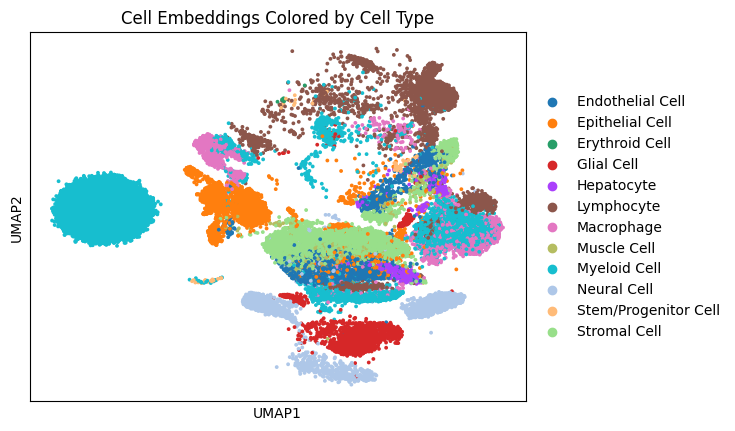

In [20]:
sc.pl.umap(adata[random_idx], color=['celltype_name'], s= 30, title = "Cell Embeddings Colored by Cell Type", save = "_cell_embs_celltype.pdf")

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


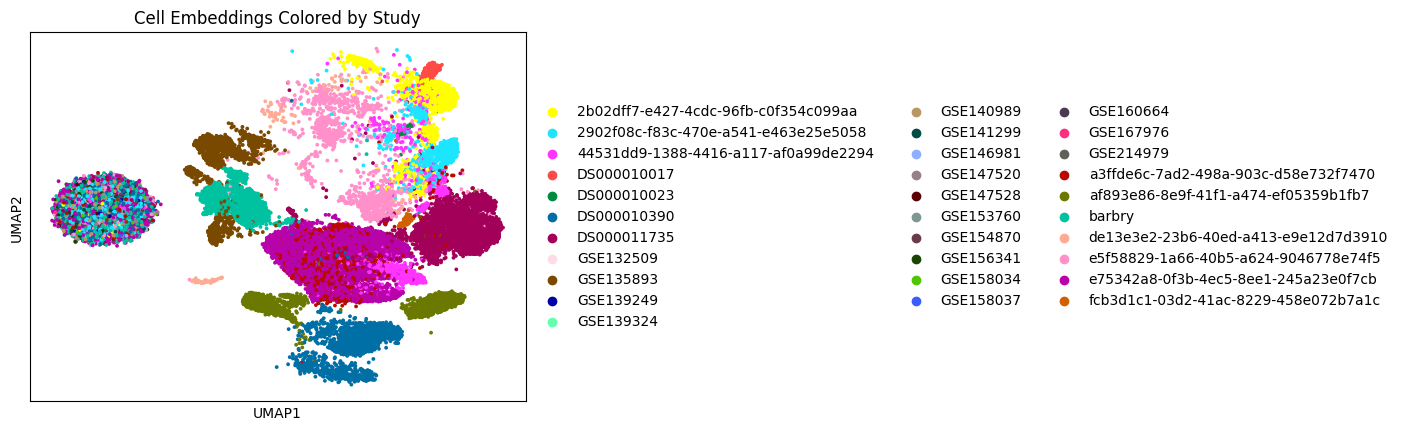

In [21]:
sc.pl.umap(adata[random_idx], color=['study'], s= 30, title = "Cell Embeddings Colored by Study", save = "_cell_embs_study.pdf")

/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/homefs/home/debroue1/miniforge3/envs/cellm/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


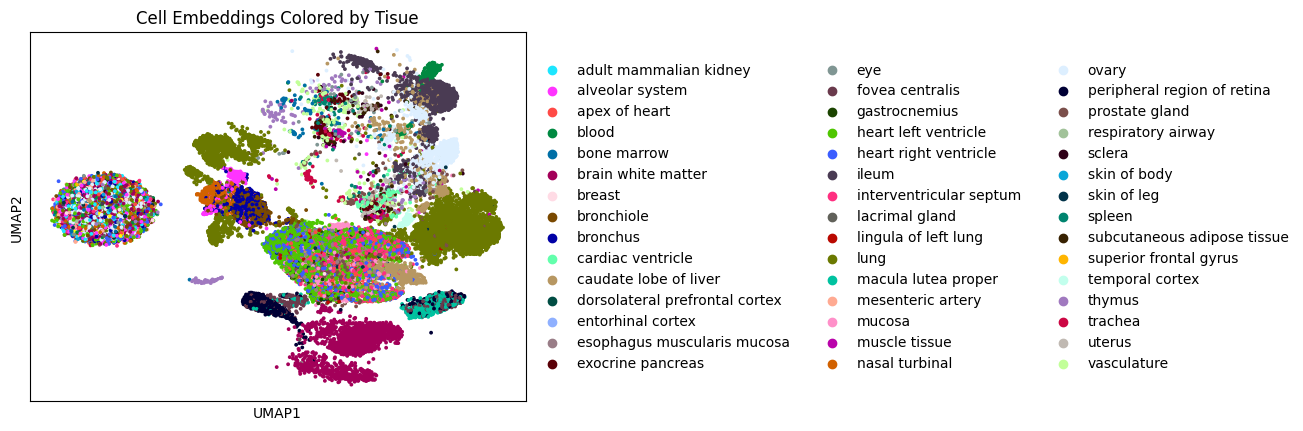

In [22]:
sc.pl.umap(adata[random_idx], color=['tissue'], s= 30, title = "Cell Embeddings Colored by Tisue", save = "_cell_embs_tissue.pdf")

In [23]:
tissue_mapping = {
    'ovary': 'Reproductive',
    'ileum': 'Digestive',
    'caudate lobe of liver': 'Liver',
    'blood': 'Hematopoietic',
    'brain white matter': 'Brain',
    'lung': 'Respiratory',
    'tonsil': 'Lymphoid',
    'bone marrow': 'Hematopoietic',
    '': 'Unspecified',
    'scrotum skin': 'Skin',
    'adult mammalian kidney': 'Kidney',
    'corneal epithelium': 'Eye',
    'respiratory airway': 'Respiratory',
    'trachea': 'Respiratory',
    'trachea;respiratory airway': 'Respiratory',
    'thymus': 'Lymphoid',
    'superior frontal gyrus': 'Brain',
    'entorhinal cortex': 'Brain',
    'colon': 'Digestive',
    'skin of body': 'Skin',
    'mesenteric artery': 'Vascular',
    'dorsolateral prefrontal cortex': 'Brain',
    'prostate gland': 'Reproductive',
    'lingula of left lung': 'Lung',
    'esophagus muscularis mucosa': 'Digestive',
    'mucosa': 'Epithelial',  # Could be more specific depending on context
    'skin of leg': 'Skin',
    'gastrocnemius': 'Muscle',
    'breast': 'Reproductive',
    'fovea centralis': 'Eye',
    'peripheral region of retina': 'Eye',
    'macula lutea proper': 'Eye',
    'bronchiole': 'Respiratory',
    'nasal turbinal': 'Respiratory',
    'bronchus': 'Respiratory',
    'alveolar system': 'Respiratory',
    'muscle tissue': 'Muscle',
    'subcutaneous adipose tissue': 'Adipose',
    'cardiac ventricle': 'Heart',
    'vasculature': 'Vascular',
    'sclera': 'Eye',
    'lacrimal gland': 'Glandular',
    'uterus': 'Reproductive',
    'eye': 'Eye',
    'spleen': 'Lymphoid',
    'exocrine pancreas': 'Glandular',
    'heart left ventricle': 'Heart',
    'interventricular septum': 'Heart',
    'heart right ventricle': 'Heart',
    'apex of heart': 'Heart',
    'temporal cortex': 'Brain'
}

print(tissue_mapping)
adata.obs["tissue"] = adata.obs["tissue"].map(tissue_mapping)

{'ovary': 'Reproductive', 'ileum': 'Digestive', 'caudate lobe of liver': 'Liver', 'blood': 'Hematopoietic', 'brain white matter': 'Brain', 'lung': 'Respiratory', 'tonsil': 'Lymphoid', 'bone marrow': 'Hematopoietic', '': 'Unspecified', 'scrotum skin': 'Skin', 'adult mammalian kidney': 'Kidney', 'corneal epithelium': 'Eye', 'respiratory airway': 'Respiratory', 'trachea': 'Respiratory', 'trachea;respiratory airway': 'Respiratory', 'thymus': 'Lymphoid', 'superior frontal gyrus': 'Brain', 'entorhinal cortex': 'Brain', 'colon': 'Digestive', 'skin of body': 'Skin', 'mesenteric artery': 'Vascular', 'dorsolateral prefrontal cortex': 'Brain', 'prostate gland': 'Reproductive', 'lingula of left lung': 'Lung', 'esophagus muscularis mucosa': 'Digestive', 'mucosa': 'Epithelial', 'skin of leg': 'Skin', 'gastrocnemius': 'Muscle', 'breast': 'Reproductive', 'fovea centralis': 'Eye', 'peripheral region of retina': 'Eye', 'macula lutea proper': 'Eye', 'bronchiole': 'Respiratory', 'nasal turbinal': 'Respira

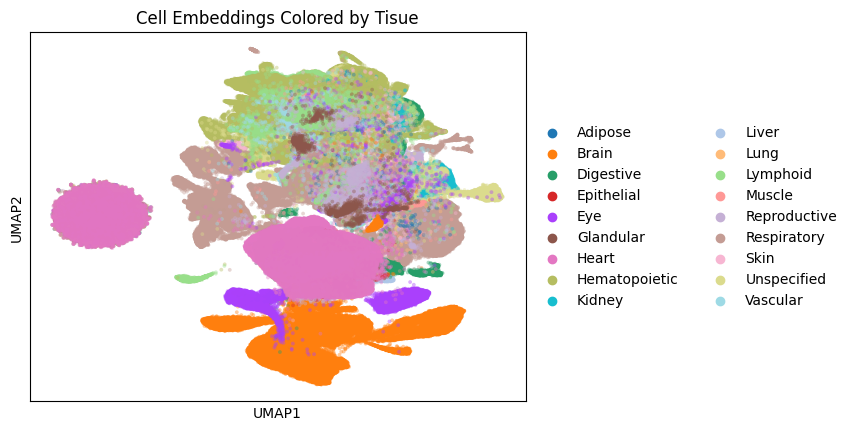

In [24]:
sc.pl.umap(adata, color=['tissue'], s= 30, title = "Cell Embeddings Colored by Tisue", save = "_cell_embs_tissue.pdf", alpha = 0.4)